# Summary
||||||||||||||||||||||||||||||||||||||||

IEEE Computational Intelligence Society · Research Prediction

Fraud Detection

|||||||||||||||||||||||||||||||||||||||||

# Packages

In [1]:
!pip install -U gdown



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Nora\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!pip install feature-engine ppscore


In [1]:
!pip install missingno ydata-profiling yellowbrick shap numba feature-engine ppscore

  Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.8 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.61.2
    Uninstalling numba-0.61.2:
      Successfully uninstalled numba-0.61.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.


In [2]:
!pip install numba --upgrade

  Using cached numba-0.61.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
Using cached numba-0.61.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.8 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.61.0
    Uninstalling numba-0.61.0:
      Successfully uninstalled numba-0.61.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires numba<=0.61,>=0.56.0, but you have numba 0.61.2 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you h

In [2]:
from pathlib import Path

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
import seaborn as sns
import shap
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import skew, kurtosis
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import ppscore as pps

## Data manipulation

In [ ]:
# Entrer le chemin d'accès correspondant à votre machine
HOME_DIR = r"C:\Users\HP\Desktop\LESLYE\ISEP2\S2\MACHINE_LEARNING\01-ieee-fraud-detection" #charger le chemin d'acces

In [4]:
plt.style.use('ggplot')  #Applique un style de graphique proche de ggplot2 (R).
%matplotlib inline
#Affiche les graphiques directement dans le notebook.

pd.set_option('display.max_rows', 500)   # Affiche jusqu'à 500 lignes
pd.set_option('display.max_columns', 500)  # Affiche jusqu'à 500 colonnes
pd.set_option('display.width', 1000)     # Largeur d'affichage


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Data

In [6]:
# lien d'accès à la base transaction https://drive.google.com/file/d/1UZUyZmSj5Jc-Ha71Zb0OdtKP2wvmOiW9/view?usp=sharing

# Charger l'id du télechargement du fichier
transaction_id = '1UZUyZmSj5Jc-Ha71Zb0OdtKP2wvmOiW9'

output_transaction = 'transaction.csv'  # charger le nom du fichier

#télécharger le fichier
gdown.download(f'https://drive.google.com/uc?id={transaction_id}', output_transaction, quiet=False)

# Charger le fichier téléchargé
transactions = pd.read_csv(output_transaction)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Charger l'id du télechargement du fichier
identity_id = '13NCfbgLHeRWeash0r1p0rv8x4oX4tq4I'

output_identity = 'identity.csv'  # charger le nom du fichier

#télécharger le fichier
gdown.download(f'https://drive.google.com/uc?id={identity_id}', output_identity, quiet=False)

# Charger le fichier téléchargé
identitys = pd.read_csv(output_identity)

In [8]:
# Fusionner les données
data = pd.merge(transaction, identity, on="TransactionID", how="left")

In [9]:
data.shape

(590540, 434)

In [10]:
# Liste des variables à convertir definies par vesta
categorical_vars = ['DeviceType', 'id_12', 'ProductCD', 'card1', 'card2', 'card3',
                    'card4', 'card5', 'card6', 'addr1', 'P_emaildomain']

# Conversion en type 'category'
data[categorical_vars] = data[categorical_vars].astype('category')

In [11]:
# Nombre total de cellules dans la base
total_cells = data.size

# Nombre total de valeurs manquantes
total_missing = data.isnull().sum().sum()

# Pourcentage global de valeurs manquantes
missing_pct_total = (total_missing / total_cells) * 100

print(f"Pourcentage global de valeurs manquantes : {missing_pct_total:.2f}%")

Pourcentage global de valeurs manquantes : 45.07%


In [12]:
# leave one 'addr' variable out
from scipy.stats import chi2_contingency


chi2_scores = []
p_values = []
cramer_vs =[]

contingency_table = pd.crosstab(data['addr1'],data['addr2'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2_scores.append(chi2)
p_values.append(p)
cramer_v = np.sqrt(chi2 / (contingency_table.shape[0] * (min(contingency_table.shape) - 1)))
cramer_vs.append(cramer_v)

print(chi2)
print(p)

11073558.163938586
0.0


In [13]:
# 1. Configuration des colonnes à supprimer
colonnes_a_supprimer = [
    'TransactionID', 'addr2', 'dist1', 'dist2',
    'R_emaildomain','DeviceType', 'DeviceInfo'
]

# 2. Ajout des colonnes D
d_cols = [f'D{i}' for i in range(1, 16) if f'D{i}' not in ['D1', 'D10', 'D15']]
colonnes_a_supprimer += d_cols

# 3. Ajout des colonnes M
m_cols = [f'M{i}' for i in range(1, 10)]
colonnes_a_supprimer += m_cols

# 4. Colonnes V avec +15% de NA (à calculer dynamiquement)
class VDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.v_cols_ = [col for col in X.columns
                       if col.startswith('V')
                       and X[col].isna().mean() > 0.15]
        return self

    def transform(self, X):
        return X.drop(columns=self.v_cols_)

# 5. Colonnes ID
id_cols = [col for col in data.columns
          if col.startswith('id_')
          and col not in ['id_01', 'id_12']]
colonnes_a_supprimer += id_cols

# 6. Pipeline final
preprocessor = Pipeline([
    ('v_dropper', VDropper()),
    ('feature_dropper', DropFeatures(features_to_drop=list(set(colonnes_a_supprimer))))
])


In [14]:
# Utilisation
df_clean = preprocessor.fit_transform(data)

In [32]:
del data
del identity
del transaction

In [15]:
df_clean.shape

(590540, 162)

In [16]:
#Strategy = fill missing values of id_12 by undefined
def preprocess_id12(df_clean):
    # Add 'undefined' to the categories of id_12
    df_clean['id_12'] = df_clean['id_12'].cat.add_categories(['undefined'])
    # Now you can fill NaN values with 'undefined'
    processed_df_clean = df_clean.assign(
        id_12=lambda df: df['id_12'].fillna('undefined')
    )
    return processed_df_clean



In [17]:
# Utilisation
df_clean = preprocess_id12(df_clean)

In [18]:
df_clean.id_12.value_counts()

,count
id_12,
undefined,446307
NotFound,123025
Found,21208


# EDA

## Analyse univariée

Variables Catégorielles: Index(['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'P_emaildomain', 'id_12'], dtype='object')


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='ProductCD', ylabel='count'>

Text(0.5, 1.0, 'Distribution de ProductCD')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'C'),
  Text(1, 0, 'H'),
  Text(2, 0, 'R'),
  Text(3, 0, 'S'),
  Text(4, 0, 'W')])

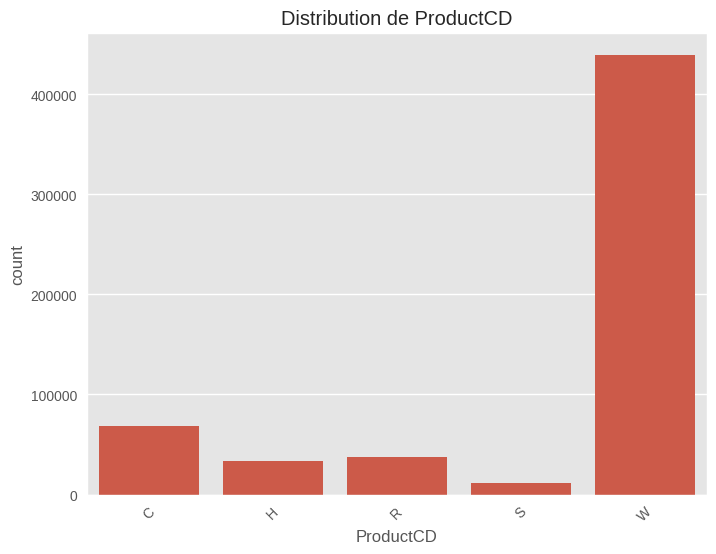

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='card1', ylabel='count'>

Text(0.5, 1.0, 'Distribution de card1')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

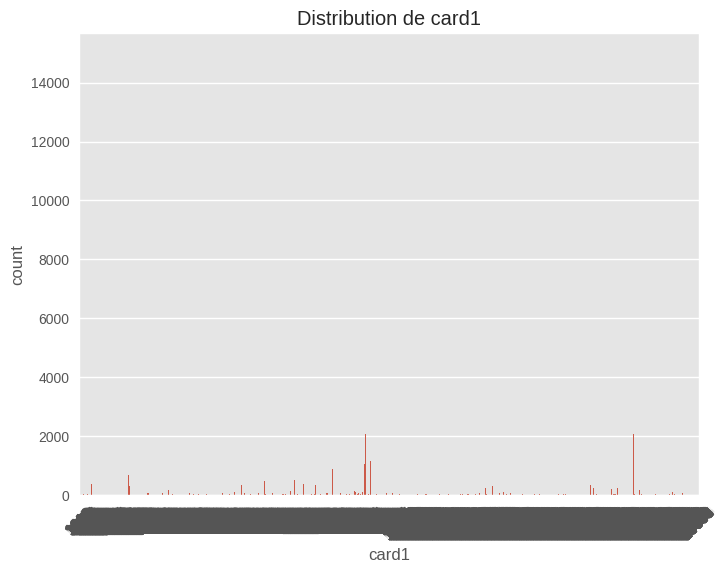

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='card2', ylabel='count'>

Text(0.5, 1.0, 'Distribution de card2')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

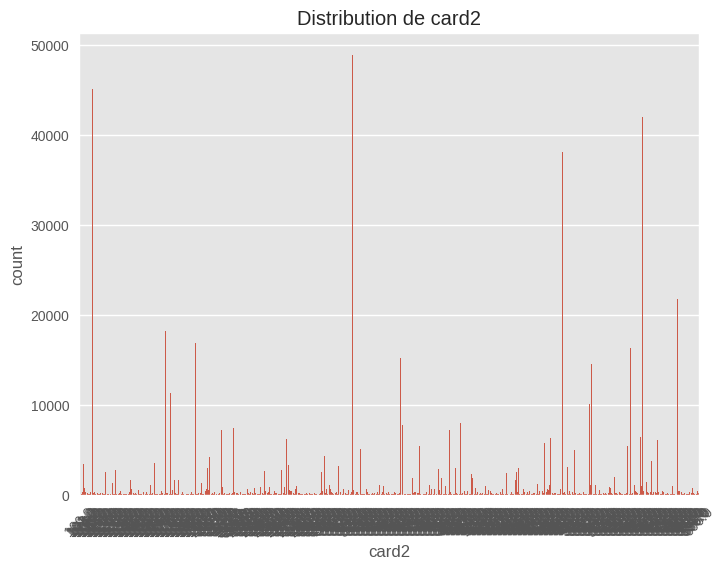

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='card3', ylabel='count'>

Text(0.5, 1.0, 'Distribution de card3')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113],
 [Text(0, 0, '100.0'),
  Text(1, 0, '101.0'),
  Text(2, 0, '102.0'),
  Text(3, 0, '105.0'),
  Text(4, 0, '106.0'),
  Text(5, 0, '107.0'),
  Text(6, 0, '108.0'),
  Text(7, 0, '109.0'),
  Text(8, 0, '111.0'),
  Text(9, 0, '114.0'),
  Text(10, 0, '116.0'),
  Text(11, 0, '117.0'),
  Text(12, 0, '118.0'),
  Text(13

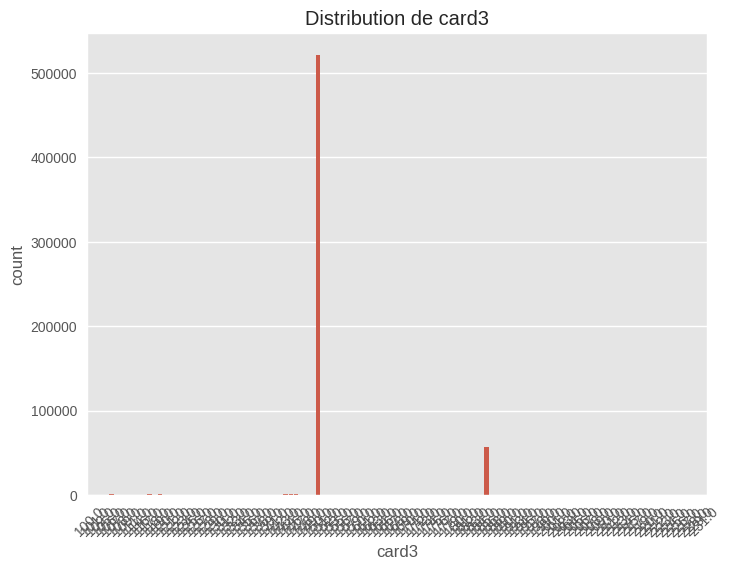

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='card4', ylabel='count'>

Text(0.5, 1.0, 'Distribution de card4')

([0, 1, 2, 3],
 [Text(0, 0, 'american express'),
  Text(1, 0, 'discover'),
  Text(2, 0, 'mastercard'),
  Text(3, 0, 'visa')])

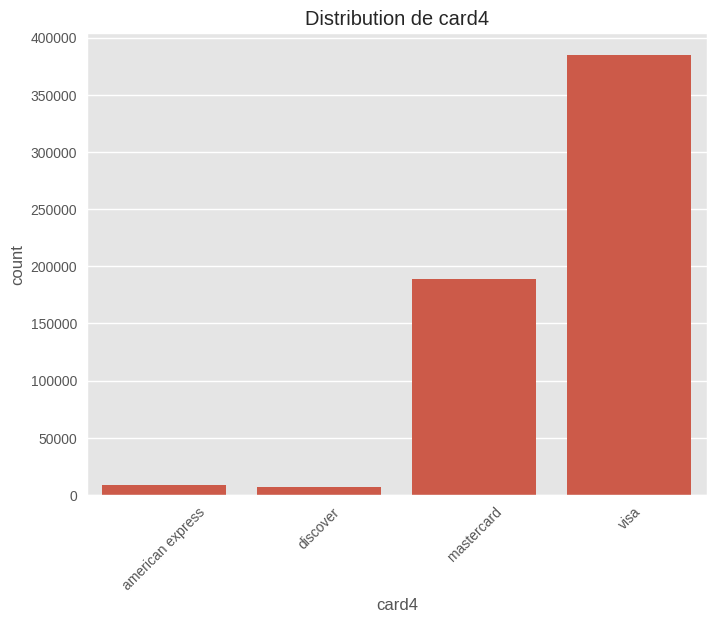

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='card5', ylabel='count'>

Text(0.5, 1.0, 'Distribution de card5')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118],
 [Text(0, 0, '100.0'),
  Text(1, 0, '101.0'),
  Text(2, 0, '102.0'),
  Text(3, 0, '104.0'),
  Text(4, 0, '105.0'),
  Text(5, 0, '106.0'),
  Text(6, 0, '107.0'),
  Text(7, 0, '109.0'),
  Text(8, 0, '111.0'),
  Text(9, 0, '112.0'),
  Text(10, 0, '113.0'),
  Text(11, 0, '114.0')

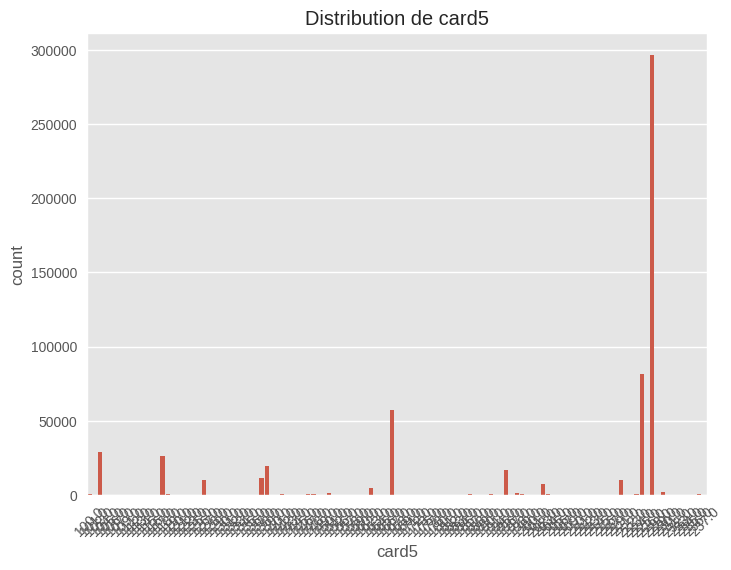

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='card6', ylabel='count'>

Text(0.5, 1.0, 'Distribution de card6')

([0, 1, 2, 3],
 [Text(0, 0, 'charge card'),
  Text(1, 0, 'credit'),
  Text(2, 0, 'debit'),
  Text(3, 0, 'debit or credit')])

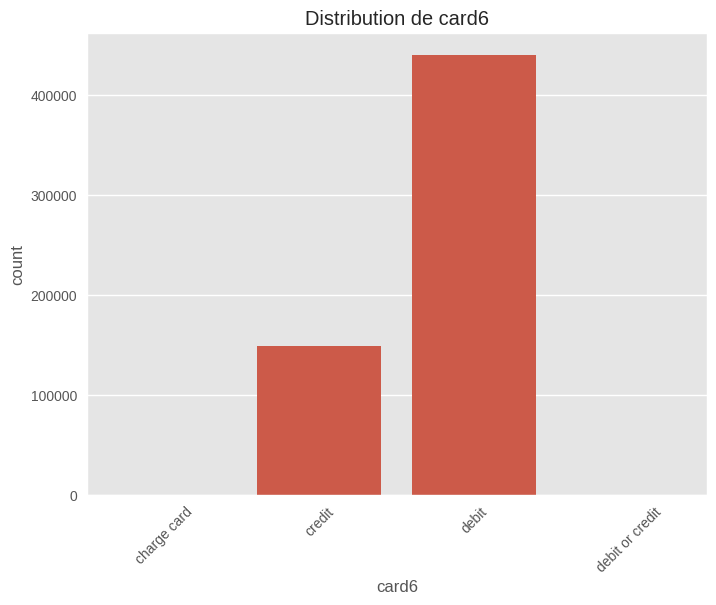

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='addr1', ylabel='count'>

Text(0.5, 1.0, 'Distribution de addr1')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

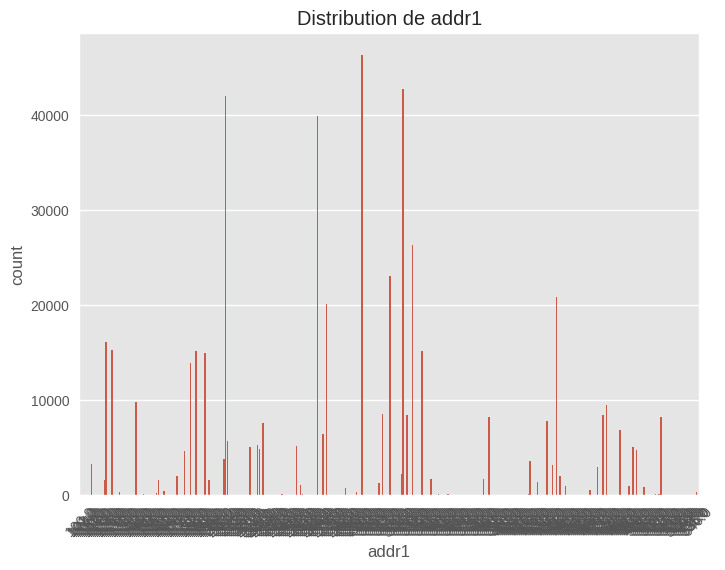

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='P_emaildomain', ylabel='count'>

Text(0.5, 1.0, 'Distribution de P_emaildomain')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58],
 [Text(0, 0, 'aim.com'),
  Text(1, 0, 'anonymous.com'),
  Text(2, 0, 'aol.com'),
  Text(3, 0, 'att.net'),
  Text(4, 0, 'bellsouth.net'),
  Text(5, 0, 'cableone.net'),
  Text(6, 0, 'centurylink.net'),
  Text(7, 0, 'cfl.rr.com'),
  Text(8, 0, 'charter.net'),
  Text(9, 0, 'comcast.net'),
  Text(10, 0, 'cox.net'),
  Text(11, 0, 'earthlink.net'),
  Text(12, 0, 'embarqmail.com'),
  Text(13, 0, 'frontier.com'),
  Text(14, 0, 'frontiernet.net'),
  Text(15, 0, 'gmail'),
  Text(16, 0, 'gmail.com'),
  Text(17, 0, 'gmx.de'),
  Text(18, 0, 'hotmail.co.uk'),
  Text(19, 0, 'hotmail.com'),
  Text(20, 0, 'hotmail.de'),
  Text(21, 0, 'hotmail.es'),
  Text(22, 0, 'h

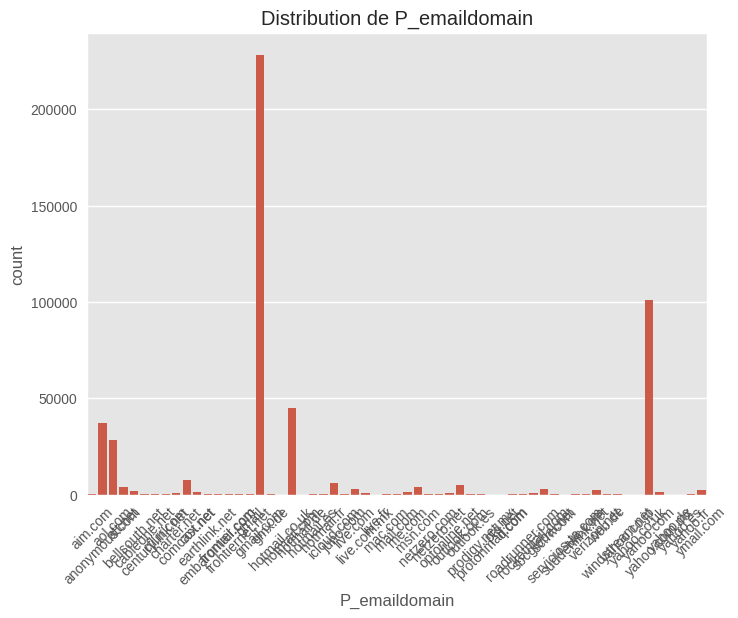

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='id_12', ylabel='count'>

Text(0.5, 1.0, 'Distribution de id_12')

([0, 1, 2],
 [Text(0, 0, 'Found'), Text(1, 0, 'NotFound'), Text(2, 0, 'undefined')])

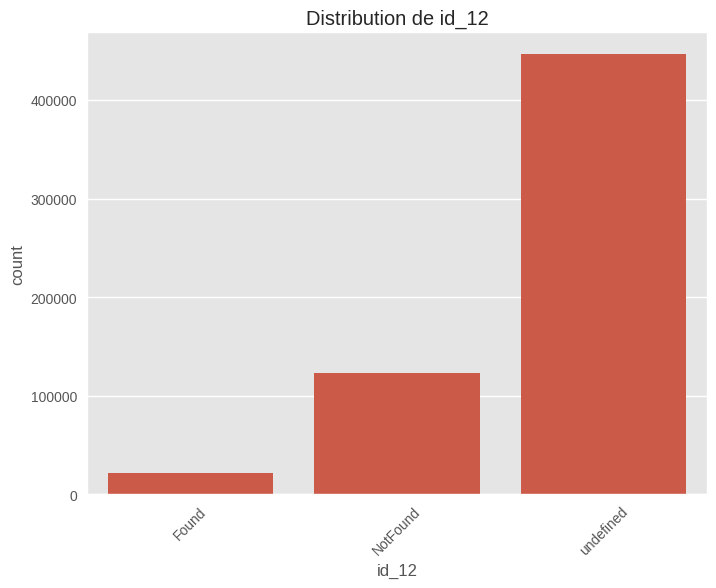

In [21]:
#Charger df_clean , identity ou data

# Identification des variables catégorielles et numériques
categorical_cols = df_clean.select_dtypes(include='category').columns
#numerical_cols = data.select_dtypes(include=['number']).columns

print("Variables Catégorielles:", categorical_cols)
#print("Variables Numériques:", numerical_cols)

# Visualisation des variables catégorielles
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_clean, x=col)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.show()

Variables Numériques: Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       ...
       'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'id_01'], dtype='object', length=152)


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='isFraud', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de isFraud')

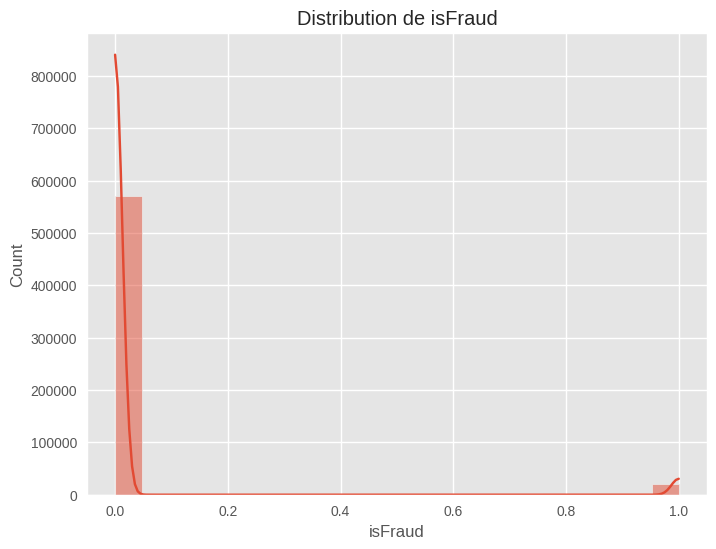

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='TransactionDT', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de TransactionDT')

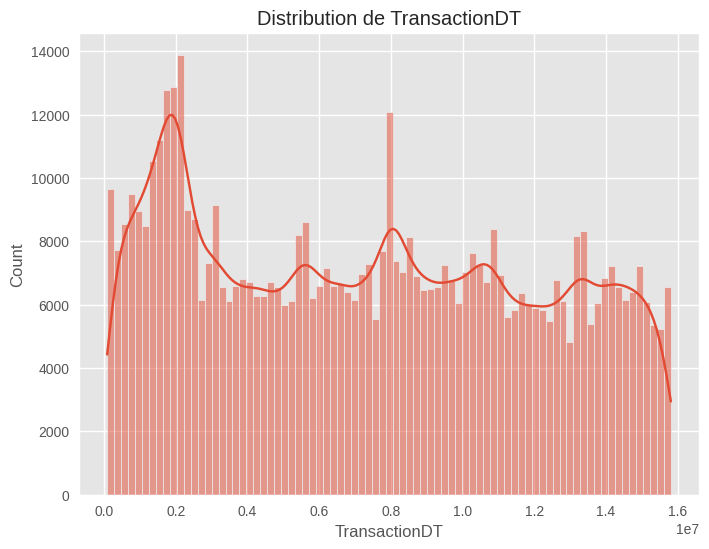

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='TransactionAmt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de TransactionAmt')

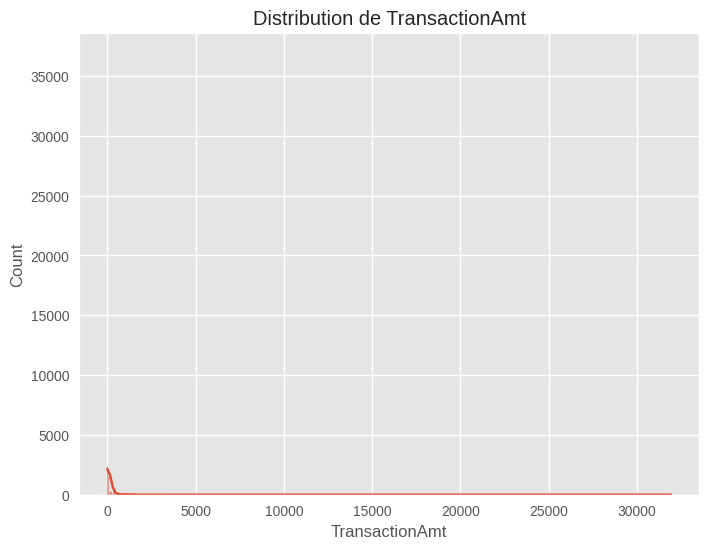

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C1', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C1')

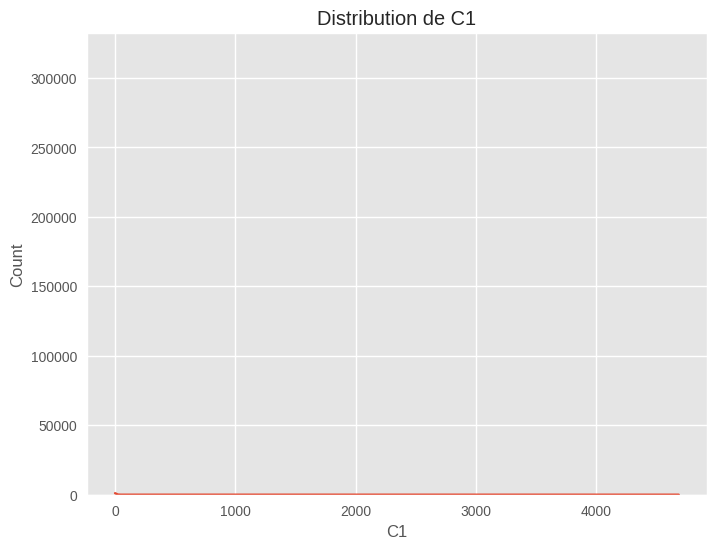

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C2')

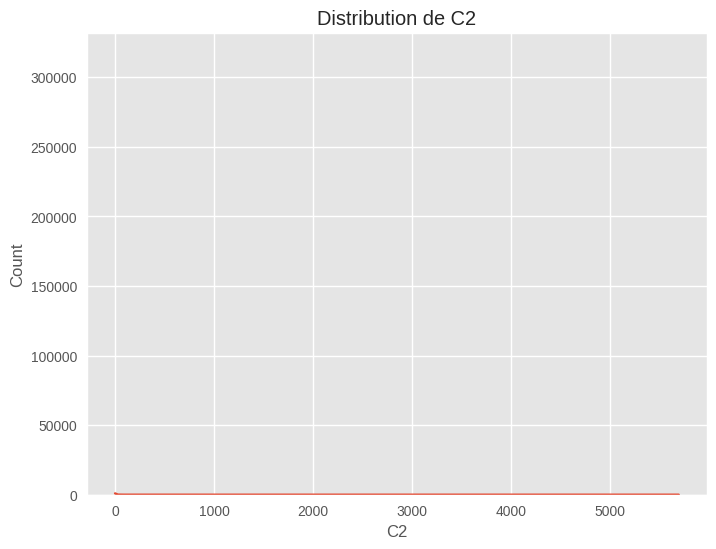

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C3', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C3')

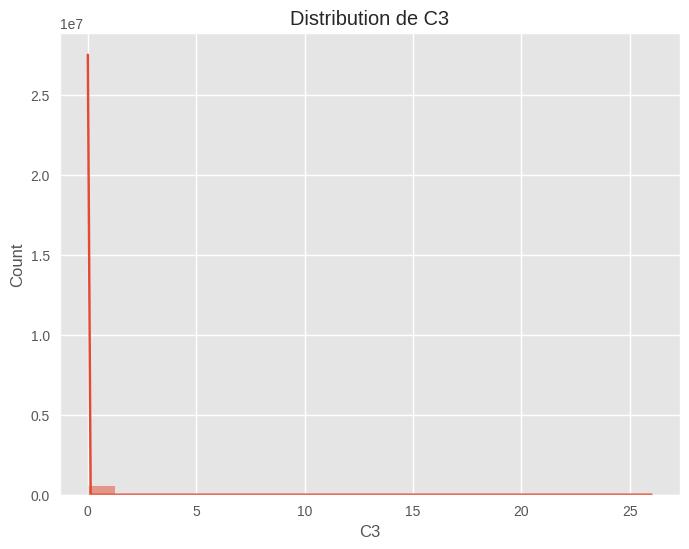

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C4', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C4')

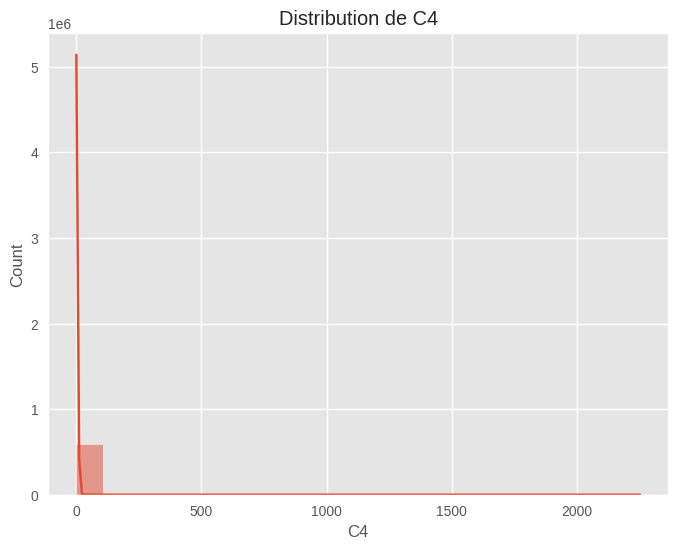

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C5', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C5')

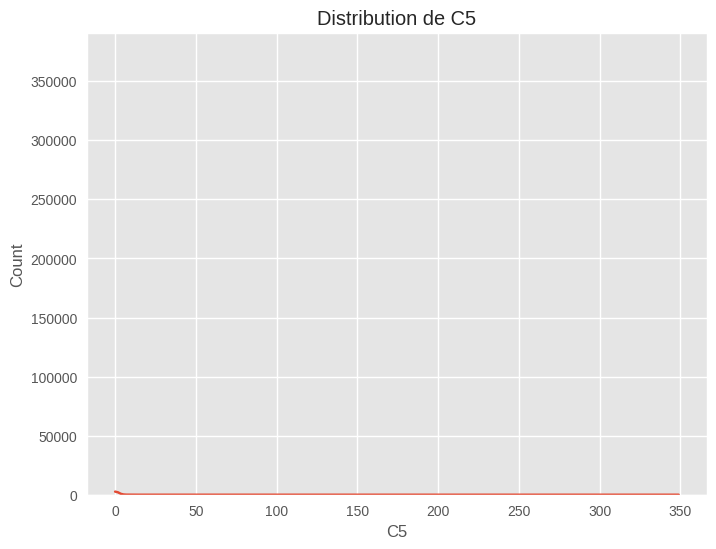

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C6', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C6')

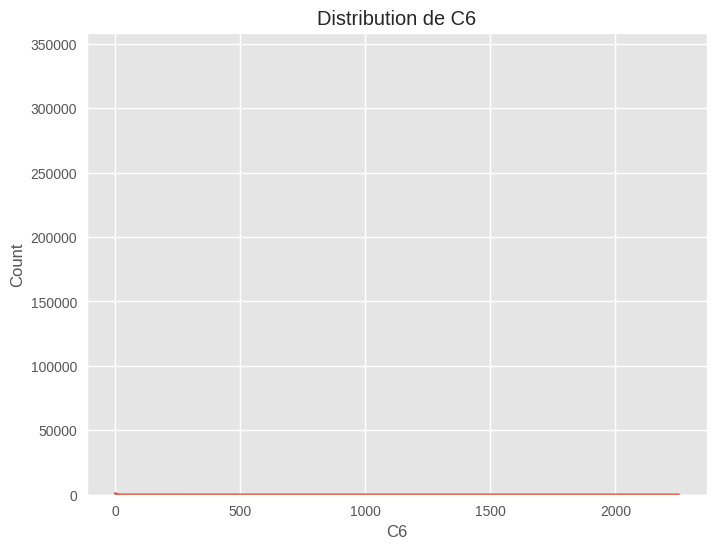

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C7', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C7')

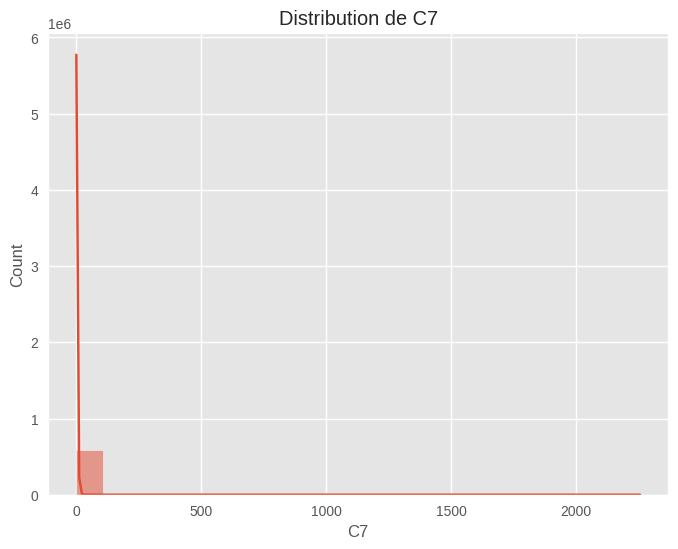

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C8', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C8')

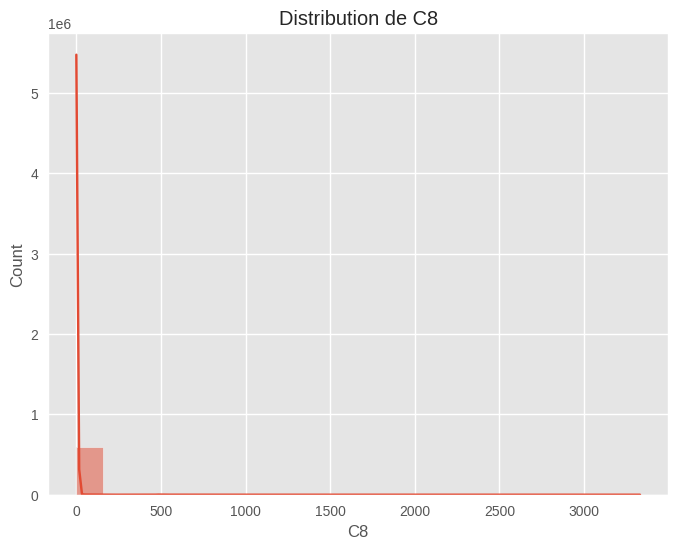

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C9', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C9')

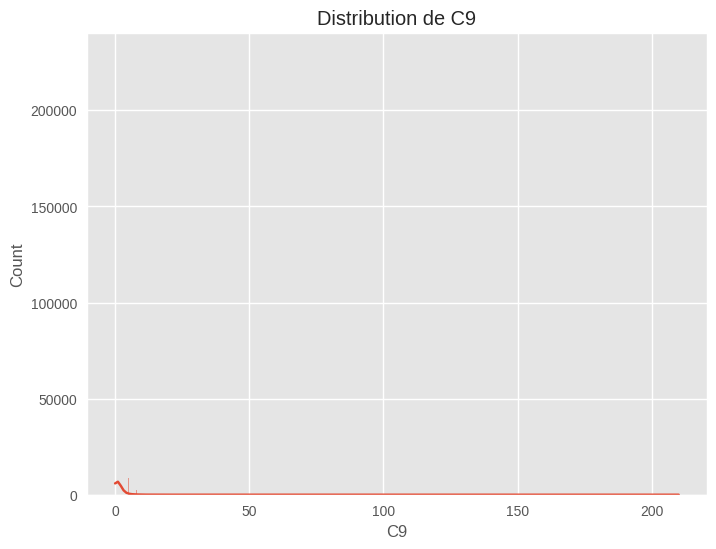

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C10', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C10')

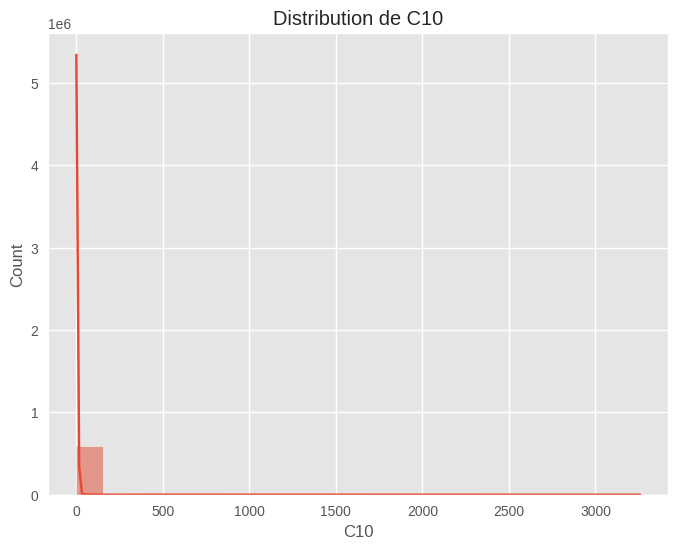

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C11', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C11')

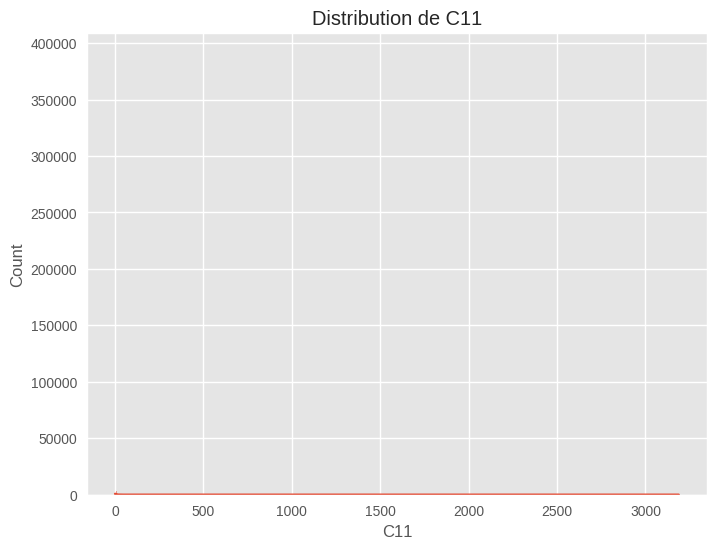

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C12', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C12')

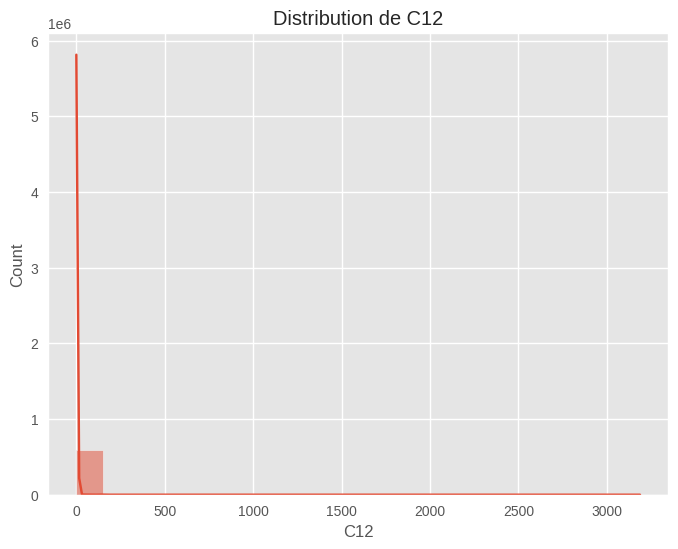

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C13', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C13')

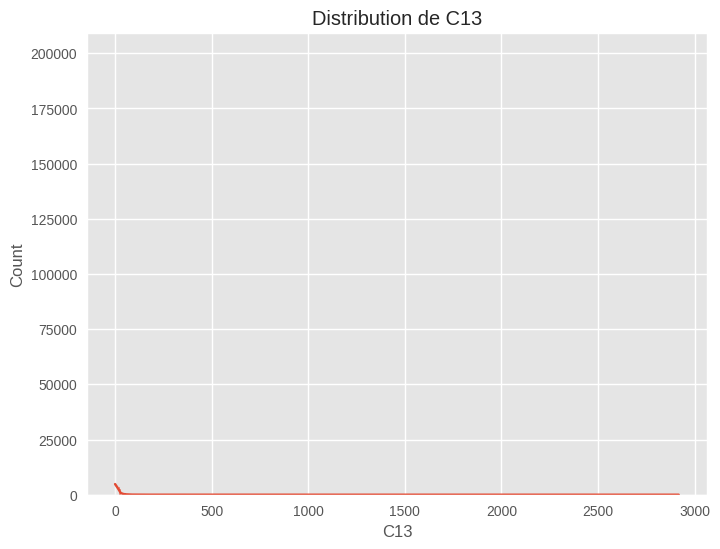

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='C14', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de C14')

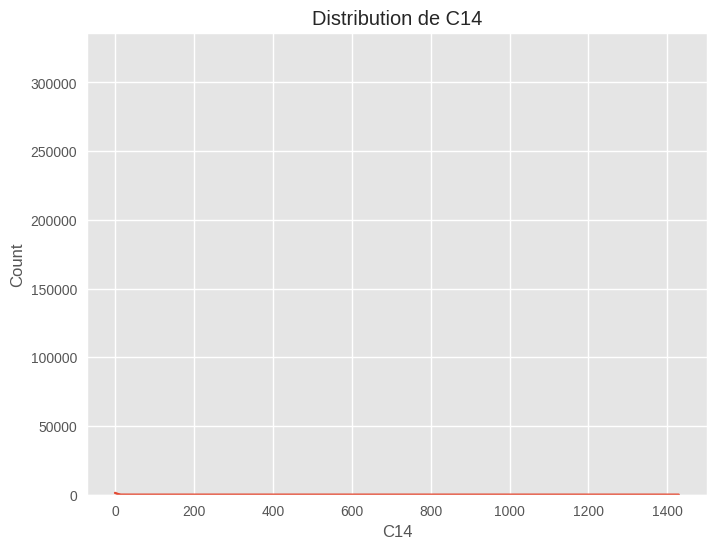

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='D1', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de D1')

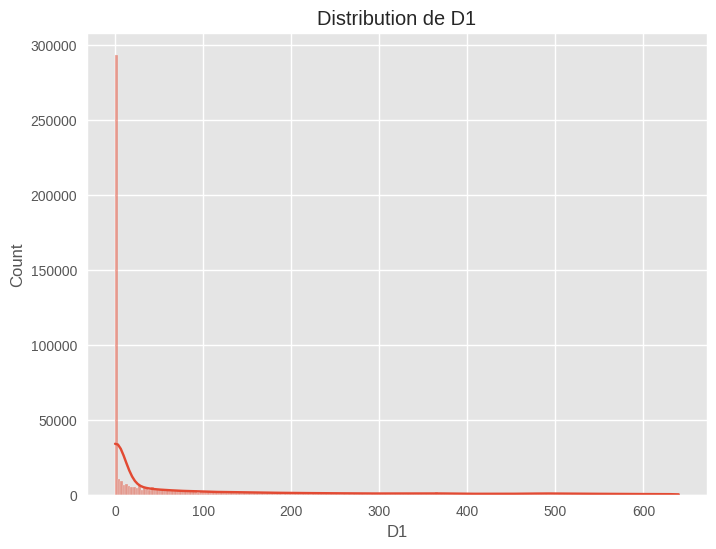

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='D10', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de D10')

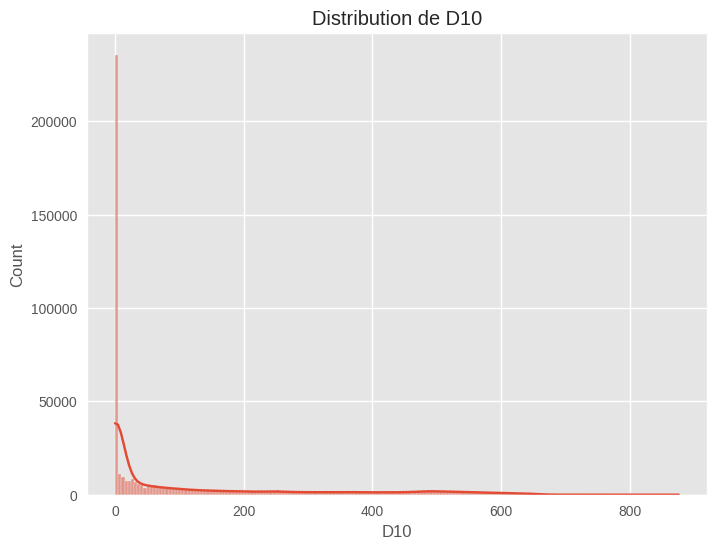

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='D15', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de D15')

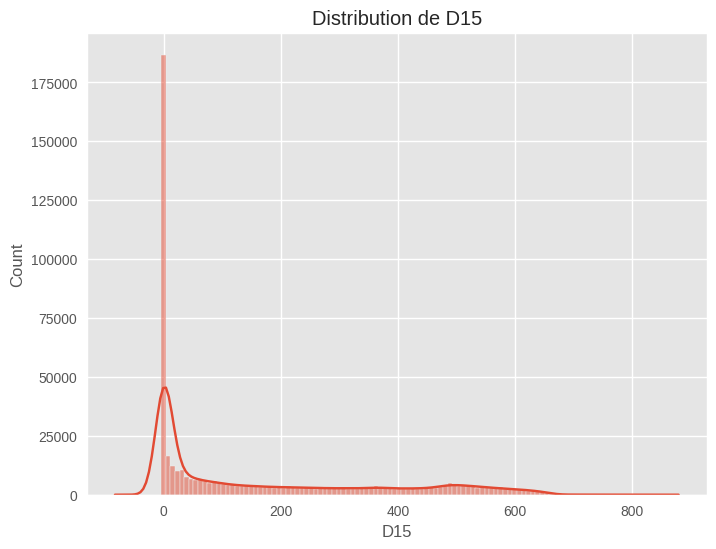

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V12', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V12')

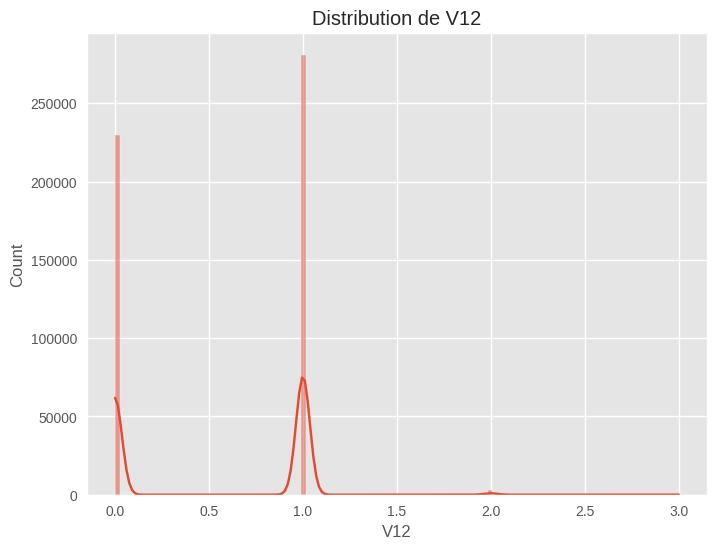

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V13', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V13')

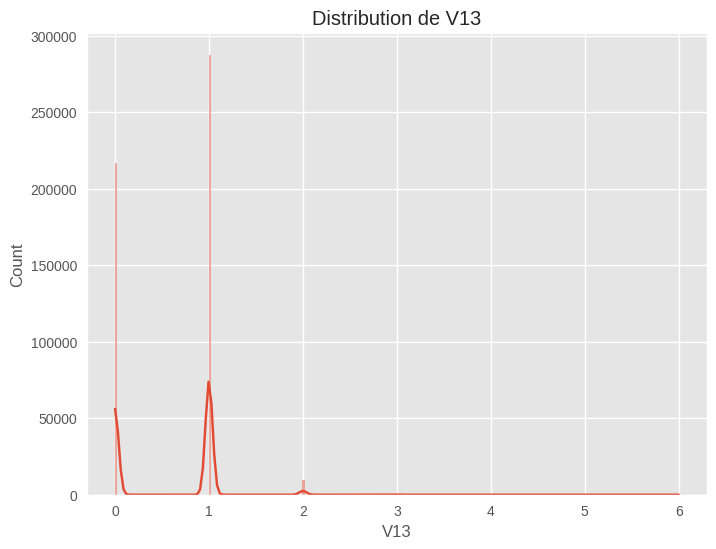

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V14', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V14')

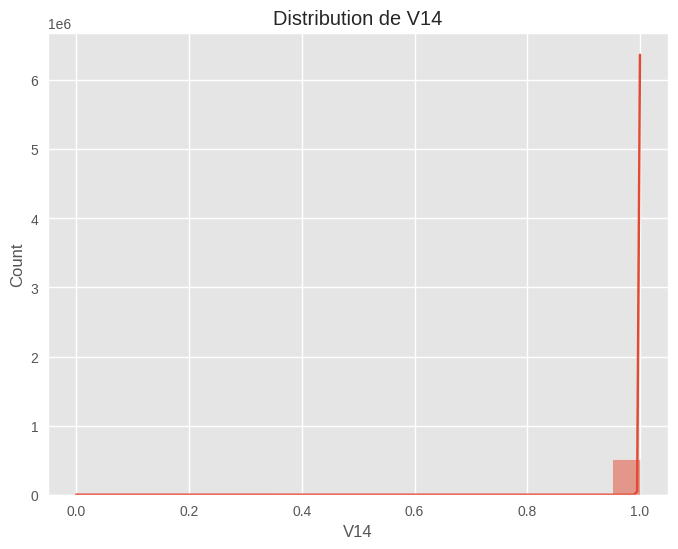

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V15', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V15')

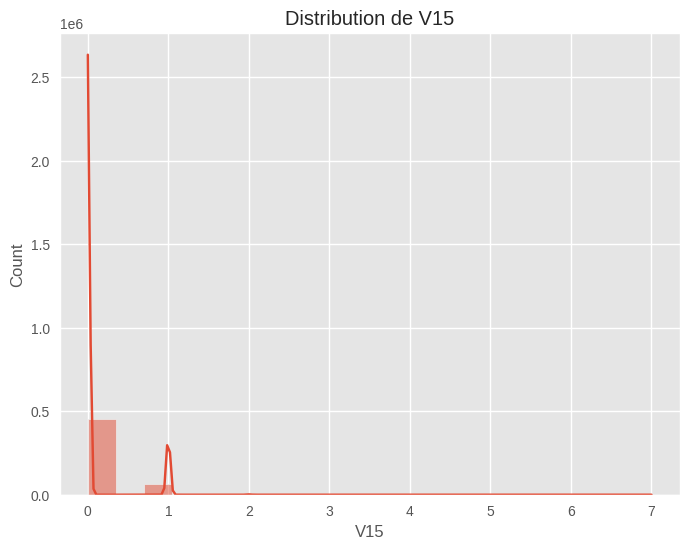

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V16', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V16')

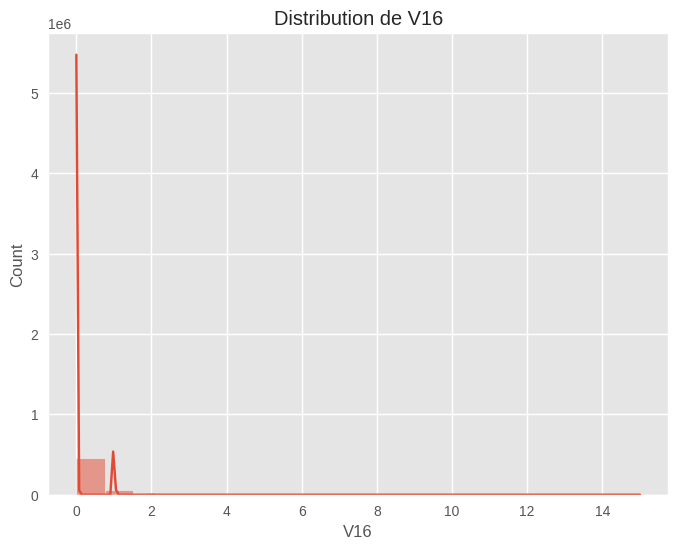

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V17', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V17')

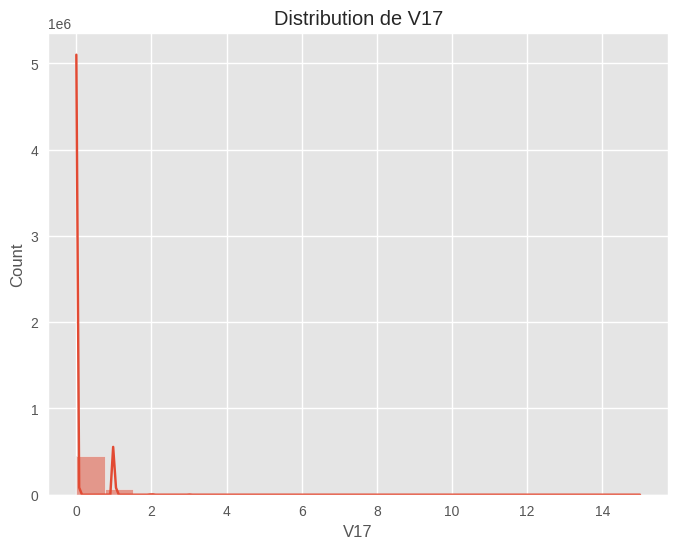

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V18', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V18')

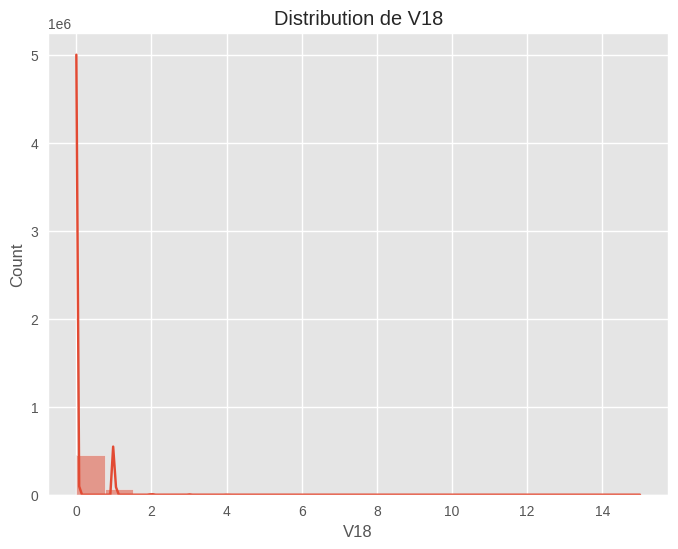

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V19', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V19')

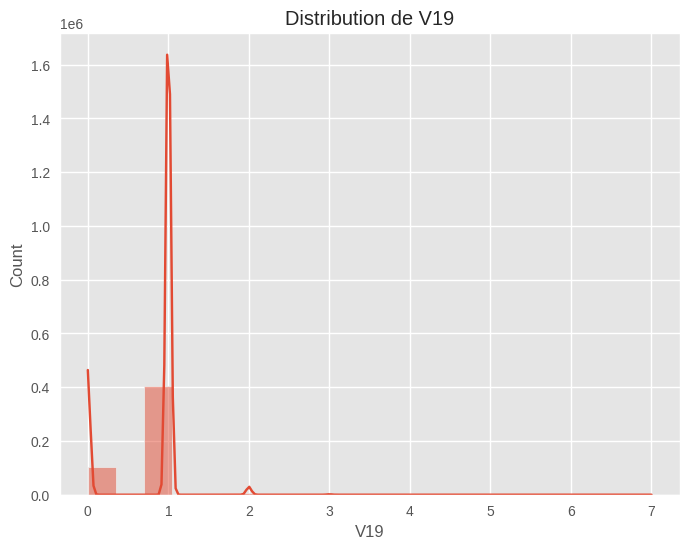

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V20', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V20')

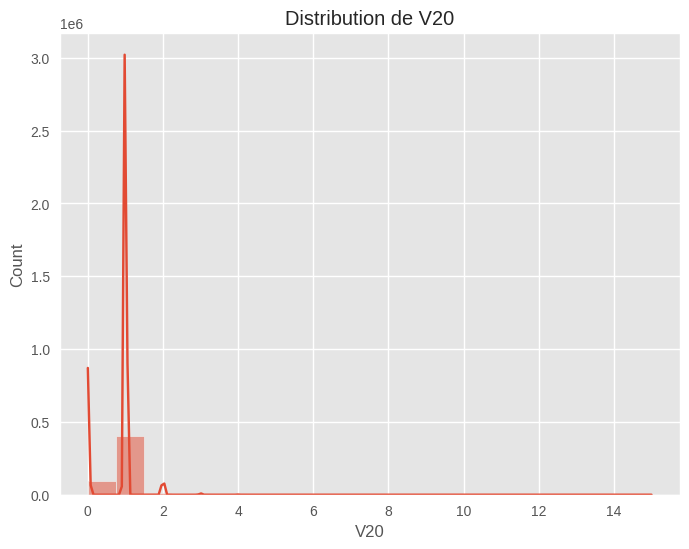

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V21', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V21')

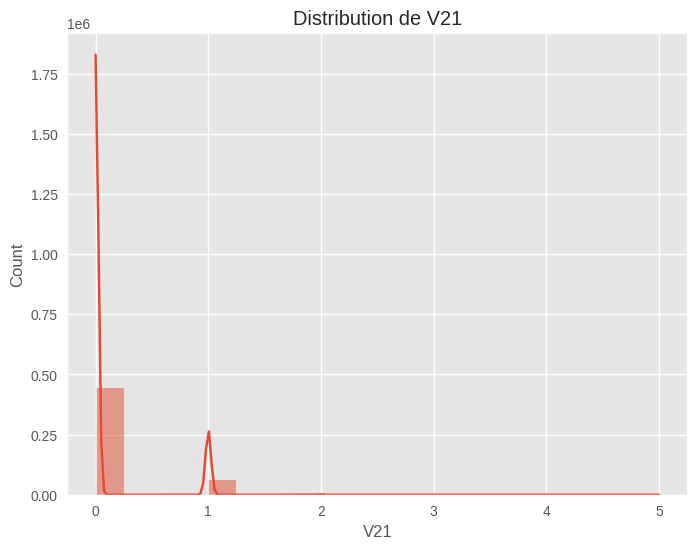

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='V22', ylabel='Count'>

Text(0.5, 1.0, 'Distribution de V22')

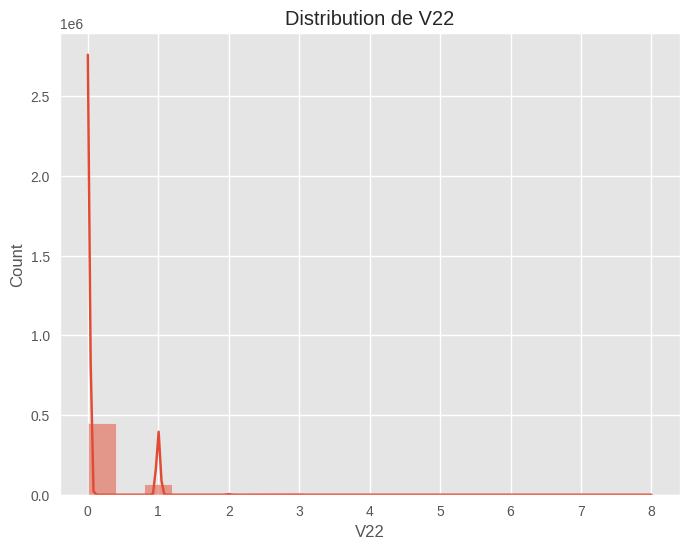

<Figure size 800x600 with 0 Axes>

KeyboardInterrupt: 

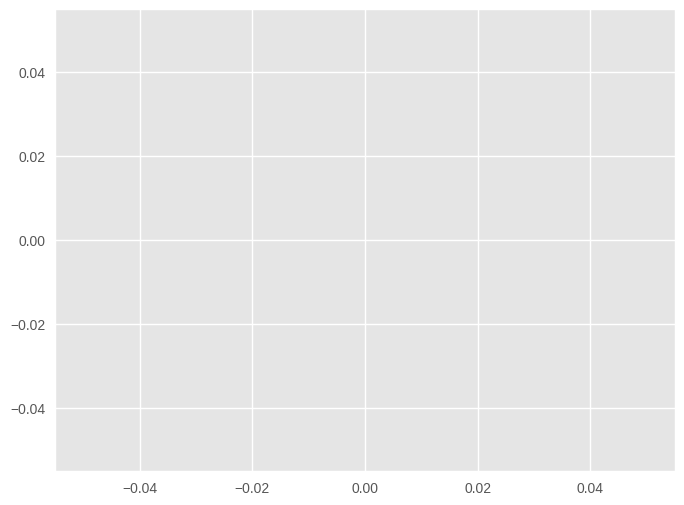

In [20]:
#Charger df_clean , identity ou data

numerical_cols = df_clean.select_dtypes(include=['number']).columns
print("Variables Numériques:", numerical_cols)

# Visualisation des variables numériques
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()


## Analyse bivariée

In [22]:
for col_name in categorical_cols:
    # Calcul des effectifs croisés entre la variable et isFraud
    counts = df_clean.groupby([col_name, 'isFraud']).size().unstack(fill_value=0)

    print(f"\nTableau d'effectifs pour {col_name} :")
    print(counts)


<ipython-input-22-9d94650054f2>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-22-9d94650054f2>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-22-9d94650054f2>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-22-9d94650054f2>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta


Tableau d'effectifs pour ProductCD :
isFraud         0     1
ProductCD              
C           60511  8008
H           31450  1574
R           36273  1426
S           10942   686
W          430701  8969

Tableau d'effectifs pour card1 :
isFraud   0  1
card1         
1000      1  0
1001      3  0
1004      5  0
1005      1  0
1006      3  0
...      .. ..
18390    64  0
18391     1  0
18393     3  0
18395    11  0
18396     1  0

[13553 rows x 2 columns]

Tableau d'effectifs pour card2 :
isFraud      0     1
card2               
100.0     7473    97
101.0      156     0
102.0      332     0
103.0     3123   345
104.0      567   187
105.0      290     0
106.0      262     0
108.0       90     1
109.0       83     0
110.0      307     2
111.0    44213   978
112.0      269     0
113.0      338     9
114.0      100     1
115.0      194     1
116.0      107     2
117.0       62     0
118.0      177     8
119.0      215    16
120.0       66     0
121.0       73     0
122.0     2485    34
1

<ipython-input-22-9d94650054f2>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-22-9d94650054f2>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-22-9d94650054f2>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Correlations

In [19]:
# 1. Corrélation pour variables numériques

variables_num = df_clean.select_dtypes(include=['float64', 'int64']).columns.drop('isFraud')
corrs = {}
for col in variables_num:
    corr, pval = spearmanr(df_clean[col].fillna(0), df_clean['isFraud'])
    corrs[col] = corr
corrs = pd.Series(corrs).sort_values(key=abs, ascending=False)

print("Top variables numériques corrélées à isFraud :")
print(corrs.head(10))


Top variables numériques corrélées à isFraud :
C7     0.170185
C4     0.161818
C12    0.158798
V33    0.158616
V34    0.157929
C8     0.155996
V15    0.154584
V16    0.154543
C10    0.153781
V18    0.146685
dtype: float64


<Figure size 600x7550 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Corrélation Spearman entre variables numériques et isFraud')

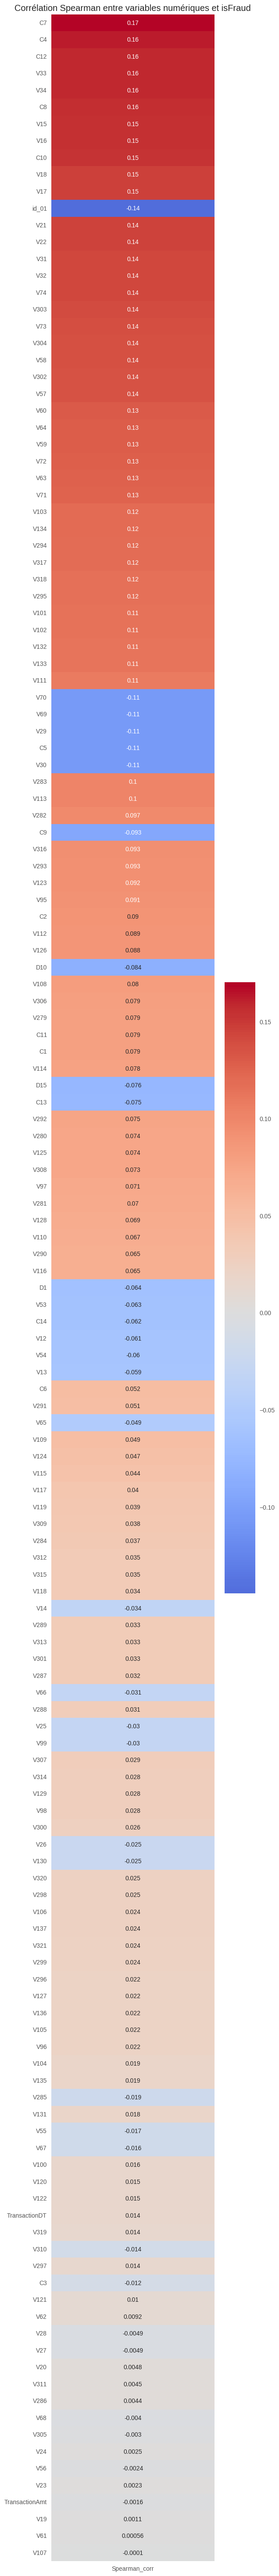

In [23]:
# --- Visualisation ---

# Création d'un DataFrame pour heatmap (corrélation entre isFraud et chaque variable)
corr_data = corrs.to_frame(name='Spearman_corr') # Change corr_series to corrs

# Heatmap simple (verticale) pour visualiser toutes les corrélations avec isFraud
plt.figure(figsize=(6, len(corr_data)/2)) # Change corr_df to corr_data
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélation Spearman entre variables numériques et isFraud')
plt.show()

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matrice de corrélation Spearman entre variables numériques')

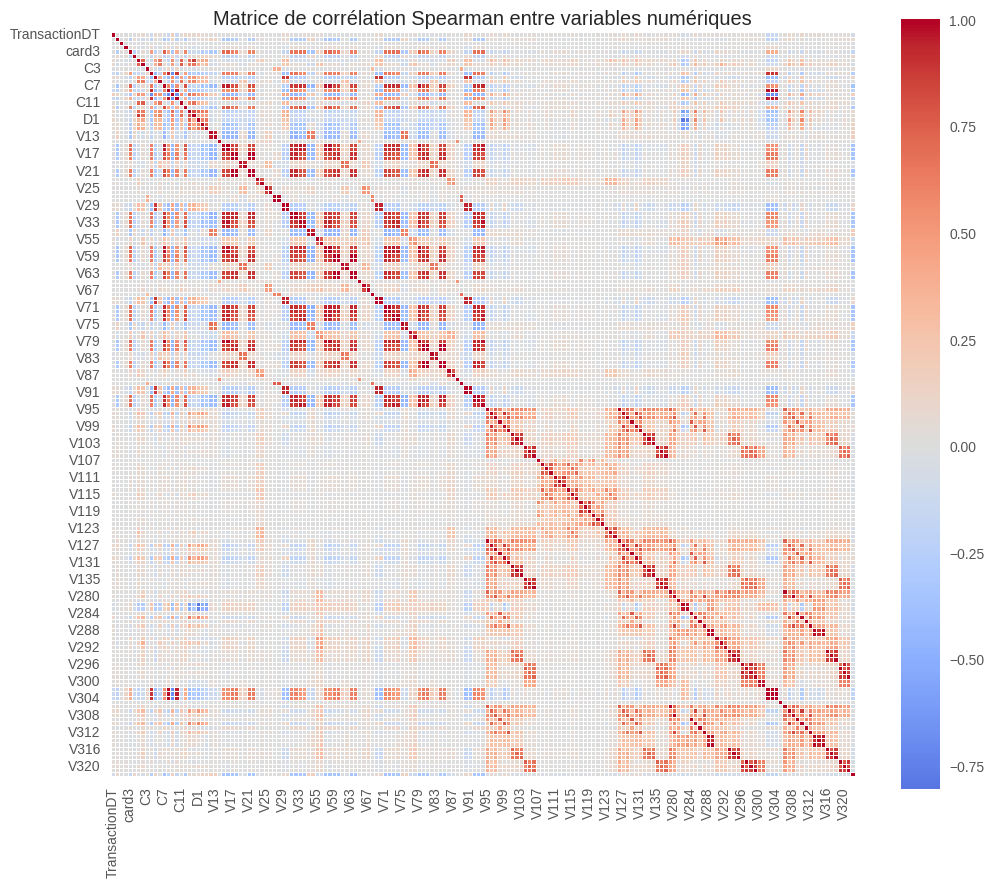

In [ ]:
# Optionnel : heatmap de la matrice de corrélation complète entre variables numériques (pour voir relations entre elles)
full_corr = data[variables_num].corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(full_corr, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Matrice de corrélation Spearman entre variables numériques')
plt.show()

Top variables catégorielles liées à isFraud (test Chi-2) :
                  chi2_stat       p_value
card1          72289.326012  0.000000e+00
card2          30850.728306  0.000000e+00
card3          17857.540520  0.000000e+00
ProductCD      16742.171529  0.000000e+00
id_12          10941.035315  0.000000e+00
card5           9231.902575  0.000000e+00
card6           5957.032292  0.000000e+00
addr1           3955.607389  0.000000e+00
P_emaildomain   3497.812835  0.000000e+00
card4            364.874139  8.969834e-79


<Figure size 1000x600 with 0 Axes>

<ipython-input-25-d0212f3864f8>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='chi2_stat', ylabel='None'>

Text(0.5, 0, 'Statistique Chi-2')

Text(0, 0.5, 'variables')

Text(0.5, 1.0, 'top variables catégorielles par statistique Chi-2 vs isFraud')

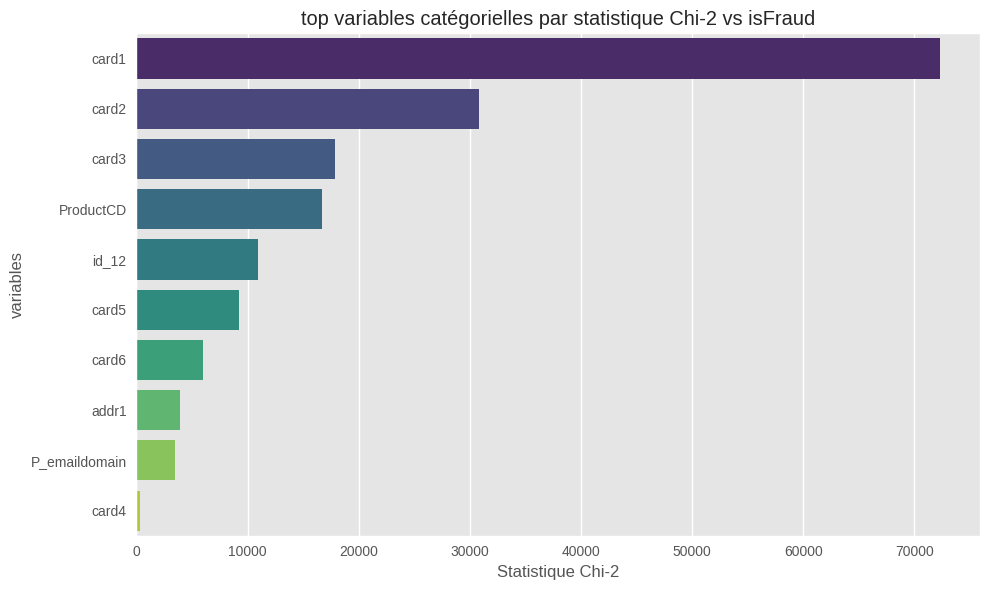

In [25]:
# 2. Test Chi-2 pour variables catégorielles

# Sélection des variables catégorielles
cat_vars = df_clean.select_dtypes(include=['object', 'category']).columns

chi2_results = {}

# Calcul Chi-2 pour chaque variable catégorielle vs isFraud
for col in cat_vars:
    contingency = pd.crosstab(df_clean[col], df_clean['isFraud'])
    # Vérifier que la table de contingence est valide (au moins 2 modalités dans chaque variable)
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        chi2_results[col] = {'chi2_stat': chi2, 'p_value': p}

# Conversion en DataFrame pour tri et affichage
chi2_data = pd.DataFrame.from_dict(chi2_results, orient='index')
chi2_data = chi2_data.sort_values(by='chi2_stat', ascending=False)

print("Top variables catégorielles liées à isFraud (test Chi-2) :")
print(chi2_data.head(10))

# --- Visualisation ---

plt.figure(figsize=(10,6))
sns.barplot(x=chi2_data['chi2_stat'].head(15), y=chi2_data.index[:15], palette='viridis')
plt.xlabel('Statistique Chi-2')
plt.ylabel('variables')
plt.title('top variables catégorielles par statistique Chi-2 vs isFraud')
plt.tight_layout()
plt.show()


In [34]:
df_clean['isFraud'].dtype

dtype('int64')

In [ ]:
import ppscore as pps

# Score entre deux colonnes
pps.score(df_clean, "card1", "isFraud")

# Matrice complète
pps_matrix = pps.matrix(df_clean)
pps_matrix[pps_matrix['y'] == 'isFraud'].sort_values('ppscore', ascending=False)

In [35]:
# verifier

pd.crosstab(df_clean['card4'], df_clean['isFraud'].astype('category'))

isFraud,0,1
card4,,
american express,8089,239
discover,6137,514
mastercard,182721,6496
visa,371394,13373


## Outliers

### Numeriques

In [ ]:
variables_num = data.select_dtypes(include=['float64', 'int64']).columns.drop('isFraud')
# Inclure int32
import math
n_cols = 3
n_rows = math.ceil(len(variables_num) / n_cols)

plt.figure(figsize=(n_cols*6, n_rows*4))
for i, col in enumerate(variables_num):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x='isFraud', y=col, data=data)
    plt.title(f'Boxplot {col} vs isFraud')
    plt.tight_layout()
plt.show()


<Axes: xlabel='TransactionAmt'>

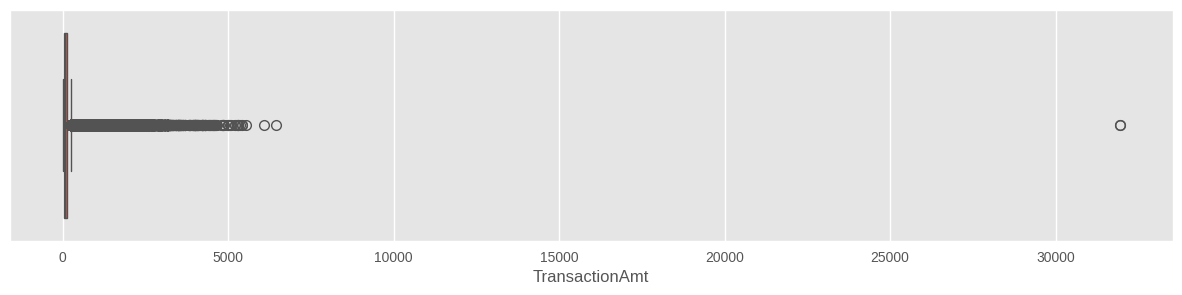

In [37]:
## Traitement de transactionAMT

# checking outliers in Amount values
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='TransactionAmt', data=df_clean)
plt.show()

In [38]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Fit and transform the data
X_robust_scaled = robust_scaler.fit_transform(df_clean[['TransactionAmt']])

# Create a new DataFrame with the scaled data
#df_clean = pd.concat([df_clean, pd.DataFrame(X_robust_scaled, columns=['TransactionAmt_scaled'])], axis=1)
#df_clean = df_clean.drop(columns=['TransactionAmt'])
#df_clean = df_clean.rename(columns={'TransactionAmt_scaled': 'TransactionAmt'})
df_scaled = pd.DataFrame(X_robust_scaled, columns=['TransactionAmt_scaled'])

,isFraud,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_12,TransactionAmt
0,0,86400,W,13926,NaN,150.0,discover,142.0,credit,315.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,undefined,-0.003293
1,0,86401,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,undefined,-0.486894
2,0,86469,W,4663,490.0,150.0,visa,166.0,debit,330.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,undefined,-0.119602
3,0,86499,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,1758.0,925.0,0.0,354.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,undefined,-0.229790
4,0,86506,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [41]:
df_clean

,isFraud,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_12,TransactionAmt
0,0,86400,W,13926,NaN,150.0,discover,142.0,credit,315.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,undefined,-0.003293
1,0,86401,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,undefined,-0.486894
2,0,86469,W,4663,490.0,150.0,visa,166.0,debit,330.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,undefined,-0.119602
3,0,86499,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,135.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,undefined,-0.229790
4,0,86506,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0

<Axes: xlabel='TransactionAmt'>

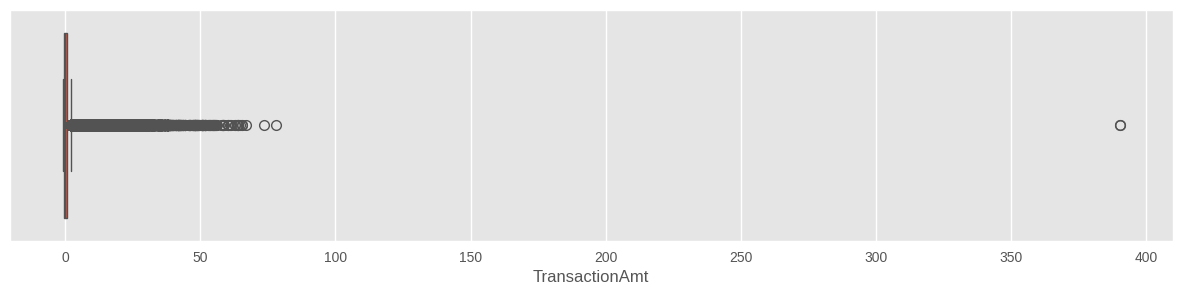

In [40]:
# new boxplot for `Amount` values
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='TransactionAmt', data=df_clean)
plt.show()

In [ ]:
# illegal transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean2.TransactionAmt[df_clean2.isFraud==1]), bins=50)
ax.set_title('Illegal Transactions by Amount')
plt.show()


In [ ]:
# legal transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean2.TransactionAmt[df_clean2.isFraud==0]), bins=50)
ax.set_title('legal Transactions by Amount')
plt.show()


### Categorielles

In [ ]:
for col_name in variables_cat:
    counts = df_clean.groupby([col_name, 'isFraud']).size().unstack()

    fig = go.Figure(data=[
        go.Bar(name='Non-Fraud', x=counts.index, y=counts[0]),
        go.Bar(name='Fraud', x=counts.index, y=counts[1])
    ])

    fig.update_layout(barmode='stack', title=f'Relation entre {col_name} et isFraud')
    fig.show(renderer="colab")

# Train test split

In [49]:
del x_val, x_test, y_val, y_test , x_train , y_train

In [50]:

# Séparation des features et de la cible
x = df_clean.drop(columns='isFraud')
y = df_clean['isFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Feature engeneering

### Datetime

In [53]:
# Train et test

def recode_date(df):
    # Calcul du jour de la semaine (0=Dimanche, 1=Lundi, ..., 6=Samedi)
    df['weekday'] = np.floor((df['TransactionDT'] / (3600 * 24) - 1) % 7).astype(int)

    # Calcul de l'heure (0-23)
    df['hour'] = np.floor(df['TransactionDT'] / 3600) % 24
    df['hour'] = df['hour'].astype(int)

    # Noms des jours en français
    days = ['Dim', 'Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam']

    # Ajout du nom du jour
    df['weekday_name'] = df['weekday'].map(lambda x: days[x])

    return df


In [55]:
# ------------application et visualisation-----------------

x_train = recode_date(x_train)

x_test = recode_date(x_test)

'''
# Visualiser les  jours
x_train.groupby('weekday_name')['isFraud'].sum().plot.bar(
    title='Nombre de fraudes par jour',
    xlabel='Jour',
    ylabel='Nombre de fraudes'
)
'''
#ne pas utiliser s'il y'a trop de barres de meme taille

"\n# Visualiser les  jours\nx_train.groupby('weekday_name')['isFraud'].sum().plot.bar(\n    title='Nombre de fraudes par jour',\n    xlabel='Jour',\n    ylabel='Nombre de fraudes'\n)\n"

In [56]:
def periode_journee(hour):
    if 0 <= hour <= 5:
        return 'Nuit'
    elif 6 <= hour <= 15:
        return 'Journée'
    elif 16 <= hour <= 23:
        return 'Soirée'
    else:
        return 'Inconnu'  # Cas hors plage 0-23
#supprimer hour apres
#autre methode 0-5 , 6-13, 14-17 h , 18 h -23h

In [57]:
x_train['periode_journee'] = x_train['hour'].apply(periode_journee)

x_test['periode_journee'] = x_test['hour'].apply(periode_journee)

### Others

## Processing

### ACP

### ENCODING

In [58]:
# categories
# transformer p_email


class EmailDomainGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=15):
        self.top_n = top_n
        self.top_domains_ = None

    def fit(self, X, y=None):
        self.top_domains_ = X['P_emaildomain'].value_counts().nlargest(self.top_n).index
        return self

    def transform(self, X):
        # Access the 'P_emaildomain' column as a Series
        column = X['P_emaildomain']

        # Add 'unknown' to categories before filling NaNs
        if 'unknown' not in column.cat.categories:
            column = column.cat.add_categories(['unknown'])
        column = column.fillna('unknown')

        # Apply the domain grouping logic
        X['P_emaildomain'] = column.apply(lambda x: x if x in self.top_domains_ else 'Others')
        return X

In [59]:
# creer le frequency encoder pour le pipeline

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.freq_dicts = {}

    def fit(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            freq = X[col].value_counts(normalize=True)
            self.freq_dicts[col] = freq
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].map(self.freq_dicts[col]).fillna(0)
        return X


In [60]:
data = df_clean.copy()

In [64]:
num_cols = x.select_dtypes(include=['number']).columns.tolist()

 # Variables catégorielles par type d'encodage

low_card_cat_features = ['card4', 'card6', 'ProductCD']
high_card_cat_features = ['P_emaildomain']


In [66]:
# Pipeline pour id_12
id12_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation avec la modalité la plus fréquente (NotFound)
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # OneHot avec suppression d'une colonne pour éviter la multicolinéarité
])

# Pipeline faible cardinalité (OneHot)
low_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Pipeline forte cardinalité
high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('frequency_encoder', FrequencyEncoder(columns=high_card_cat_features))
])


In [67]:

#. Choix du scaler en fonction de la distribution
scaler_mapping = {}

for col in num_cols:
    col_data = data[col].dropna()
    if col_data.nunique() <= 1:
        continue  # Trop peu de variation, inutile de scaler

    skewness = skew(col_data)
    kurt = kurtosis(col_data)

    if abs(skewness) < 1 and abs(kurt) < 3:
        scaler_mapping[col] = StandardScaler()
    elif abs(skewness) > 2 or abs(kurt) > 5:
        scaler_mapping[col] = RobustScaler()
    else:
        scaler_mapping[col] = MinMaxScaler()


# Liste des transformers numériques
num_transformers = [
    (f"{col}_scaler", scaler, [col]) for col, scaler in scaler_mapping.items()
]
num_column_transformer = ColumnTransformer(transformers=num_transformers)

'''
# . Pipeline général (ici uniquement pour la mise à l’échelle)
preprocessing_pipeline = Pipeline([
    ('scaling', column_transformer)
])


# 6. Création du DataFrame des variables standardisées
df_scaled = pd.DataFrame(
    scaled_array,
    columns=[f"{col}_scaled" for col in scaler_mapping],
    index=data.index
)

# Optionnel : fusionner avec les autres colonnes non numériques
df_final = pd.concat([data.drop(columns=scaler_mapping.keys()), df_scaled], axis=1)

# Affichage
print("Dimensions du DataFrame final :", df_final.shape)
print(df_final.head())
'''

'\n# . Pipeline général (ici uniquement pour la mise à l’échelle)\npreprocessing_pipeline = Pipeline([\n    (\'scaling\', column_transformer)\n])\n\n\n# 6. Création du DataFrame des variables standardisées\ndf_scaled = pd.DataFrame(\n    scaled_array,\n    columns=[f"{col}_scaled" for col in scaler_mapping],\n    index=data.index\n)\n\n# Optionnel : fusionner avec les autres colonnes non numériques\ndf_final = pd.concat([data.drop(columns=scaler_mapping.keys()), df_scaled], axis=1)\n\n# Affichage\nprint("Dimensions du DataFrame final :", df_final.shape)\nprint(df_final.head())\n'

In [71]:

# Exemple (repris de ta question précédente)
preprocessor = ColumnTransformer(transformers=[
    ('num', num_column_transformer, list(scaler_mapping.keys())),
    ('id12', id12_transformer, ['id_12']),
    ('low_card', low_card_transformer, low_card_cat_features),
    ('high_card', high_card_transformer, high_card_cat_features)
])


In [72]:
full_pipeline = Pipeline([
    ('preprocessing', preprocessor)
])


In [ ]:
full_pipeline.fit(x_train)

In [ ]:
feature_names = full_pipeline.named_steps['preprocessing'].get_feature_names_out()


# 1Modeling